In [1]:
%matplotlib inline
import import_ipynb
import NeuralNet_FromScratch as nnfs_module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from nnfs.datasets import spiral_data
from nnfs.datasets import sine_data
from zipfile import ZipFile
import nnfs
import os
import urllib
import urllib.request
import cv2

style.use("dark_background")

# Retreive Dataset

In [2]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

if not os.path.isdir(FOLDER):
    print("Unzipping images ...")
    with ZipFile(FILE) as zip_images:
        zip_images.extractall(FOLDER)
    print('DONE')
    
print("Date preparation is complete.")

Date preparation is complete.


# Fashion MNIST Classifications
0: T-shirt / top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle Boot

# Data Loading Function

In [3]:
def load_mnist_dataset(dataset, path):
    
    #scan all directories and create list of labels
    labels = os.listdir(os.path.join(path, dataset))
    
    #create lists for samples and labels
    X = []
    y = []
    
    #for each label folder
    for label in labels:
        #for each image in the given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            #read the image
            image = cv2.imread(os.path.join(\
                                path, dataset, label, file),\
                               cv2.IMREAD_UNCHANGED)
            
            #append image to x and label to y
            X.append(image)
            y.append(label)
            
    #convert data structure to numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

# Create MNIST Train & Test Datasets

In [4]:
def create_data_mnist(path):
    
    #load both sets
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    #return all datasets
    return X, y, X_test, y_test

# Generate Train and Test Sets

In [5]:
X, y, X_test, y_test = create_data_mnist(FOLDER)
print(len(X))
print(len(y))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


# Data Preprocessing

## Scale features
range from -1 to 1

In [6]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


## Reshape Data
From 3D to 2D

In [7]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Shuffle Samples

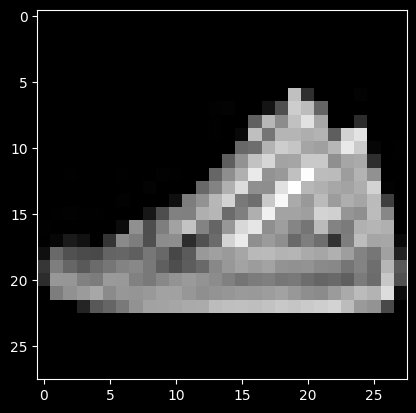

7


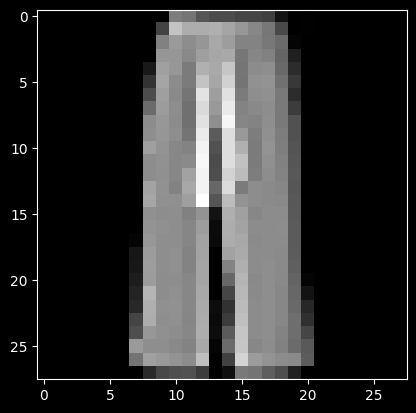

1


In [8]:
keys = np.array(range(X.shape[0])) #number of indices in samples
np.random.shuffle(keys) #shuffle indices

#grab by indice and assign to array
X = X[keys]
y = y[keys]

#test shuffling
plt.imshow(X[8].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[8])

plt.imshow(X[999].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[999])

# Training

In [9]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 64)) #dense layer 1 with 64 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(64,64)) #dense layer 2 with 64 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(64,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=5e-5),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=5, batch_size=128, print_every=100)



epoch: 1
step: 0, acc: 0.172, loss: 2.468 (data_loss: 2.468, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.742, loss: 0.599 (data_loss: 0.599, reg_loss: 0.000000), lr: 0.0009950248756218907
step: 200, acc: 0.898, loss: 0.357 (data_loss: 0.357, reg_loss: 0.000000), lr: 0.0009900990099009901
step: 300, acc: 0.836, loss: 0.473 (data_loss: 0.473, reg_loss: 0.000000), lr: 0.0009852216748768474
step: 400, acc: 0.844, loss: 0.475 (data_loss: 0.475, reg_loss: 0.000000), lr: 0.000980392156862745
step: 468, acc: 0.875, loss: 0.372 (data_loss: 0.372, reg_loss: 0.000000), lr: 0.0009771350400625367
epoch: 2
step: 0, acc: 0.836, loss: 0.505 (data_loss: 0.505, reg_loss: 0.000000), lr: 0.0009770873027505008
step: 100, acc: 0.828, loss: 0.484 (data_loss: 0.484, reg_loss: 0.000000), lr: 0.000972337012008362
step: 200, acc: 0.938, loss: 0.245 (data_loss: 0.245, reg_loss: 0.000000), lr: 0.0009676326866321544
step: 300, acc: 0.883, loss: 0.387 (data_loss: 0.387, reg_loss: 0.000000), lr: 0.00096297366267

In [10]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 128)) #dense layer 1 with 128 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(128,128)) #dense layer 2 with 128 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(128,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=1e-3),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=10, batch_size=128, print_every=100)

epoch: 1
step: 0, acc: 0.133, loss: 2.664 (data_loss: 2.664, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.766, loss: 0.571 (data_loss: 0.571, reg_loss: 0.000000), lr: 0.0009090909090909091
step: 200, acc: 0.891, loss: 0.330 (data_loss: 0.330, reg_loss: 0.000000), lr: 0.0008333333333333334
step: 300, acc: 0.844, loss: 0.413 (data_loss: 0.413, reg_loss: 0.000000), lr: 0.0007692307692307692
step: 400, acc: 0.883, loss: 0.436 (data_loss: 0.436, reg_loss: 0.000000), lr: 0.0007142857142857143
step: 468, acc: 0.885, loss: 0.354 (data_loss: 0.354, reg_loss: 0.000000), lr: 0.000681198910081744
epoch: 2
step: 0, acc: 0.852, loss: 0.478 (data_loss: 0.478, reg_loss: 0.000000), lr: 0.0006807351940095304
step: 100, acc: 0.820, loss: 0.480 (data_loss: 0.480, reg_loss: 0.000000), lr: 0.0006373486297004461
step: 200, acc: 0.930, loss: 0.244 (data_loss: 0.244, reg_loss: 0.000000), lr: 0.0005991611743559018
step: 300, acc: 0.875, loss: 0.297 (data_loss: 0.297, reg_loss: 0.000000), lr: 0.0005652911249

In [11]:
model.evaluate(X_test, y_test)

Validation, acc: 0.879, loss: 0.337


## Model training with parameter copying functionality

In [12]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 128)) #dense layer 1 with 128 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(128,128)) #dense layer 2 with 128 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(128,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=1e-3),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=10, batch_size=128, print_every=100)

parameters = model.get_parameters()

#New model
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 128)) #dense layer 1 with 128 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(128,128)) #dense layer 2 with 128 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(128,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#set model with parameter instead of training it
model.set_parameters(parameters)

#evaluate the model
model.evaluate(X_test, y_test)

epoch: 1
step: 0, acc: 0.070, loss: 2.848 (data_loss: 2.848, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.758, loss: 0.571 (data_loss: 0.571, reg_loss: 0.000000), lr: 0.0009090909090909091
step: 200, acc: 0.891, loss: 0.336 (data_loss: 0.336, reg_loss: 0.000000), lr: 0.0008333333333333334
step: 300, acc: 0.852, loss: 0.444 (data_loss: 0.444, reg_loss: 0.000000), lr: 0.0007692307692307692
step: 400, acc: 0.844, loss: 0.506 (data_loss: 0.506, reg_loss: 0.000000), lr: 0.0007142857142857143
step: 468, acc: 0.885, loss: 0.404 (data_loss: 0.404, reg_loss: 0.000000), lr: 0.000681198910081744
epoch: 2
step: 0, acc: 0.852, loss: 0.454 (data_loss: 0.454, reg_loss: 0.000000), lr: 0.0006807351940095304
step: 100, acc: 0.828, loss: 0.457 (data_loss: 0.457, reg_loss: 0.000000), lr: 0.0006373486297004461
step: 200, acc: 0.930, loss: 0.239 (data_loss: 0.239, reg_loss: 0.000000), lr: 0.0005991611743559018
step: 300, acc: 0.875, loss: 0.343 (data_loss: 0.343, reg_loss: 0.000000), lr: 0.0005652911249